In [ ]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

In [ ]:
data = datasets.load_digits()

In [ ]:
x = data['images']
y = data['target']

0


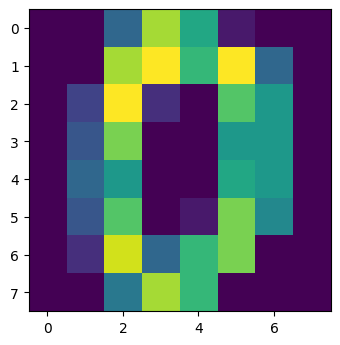

In [ ]:
plt.figure(dpi=100)
plt.imshow(x[0])
print(y[0])

In [ ]:
print(x[0:2])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]]


In [ ]:
XI = x.reshape(-1,64)
print(XI)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(XI,y,test_size=0.2)

In [ ]:
print(x_train.shape,y_train.shape)

(1437, 64) (1437,)


In [ ]:
red_neuronal = MLPClassifier(hidden_layer_sizes=(64,2*64-1,32), learning_rate_init=0.01)

In [ ]:
red_neuronal.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 127, 32), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = red_neuronal.predict(x_test)

In [ ]:
red_neuronal.score(x_test,y_test)

0.9777777777777777

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.95      0.97      0.96        37
           2       0.95      1.00      0.97        36
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        30
           5       0.97      0.92      0.95        38
           6       0.97      1.00      0.98        32
           7       1.00      1.00      1.00        33
           8       0.97      0.89      0.93        38
           9       0.97      1.00      0.99        33

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



0 0
5 5
6 6
8 8
2 2


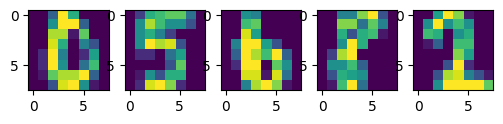

In [ ]:
fig, axs = plt.subplots(1,5,dpi=100)
for i in range(0,5):
  axs[i].imshow(x_test[i].reshape(8,8))
  print(y_pred[i],y_test[i])

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=64),
     layers.Dense(64,activation="relu"),
     layers.Dense(64*2-1,activation="relu"),
     layers.Dense(32,activation="relu"),
     layers.Dense(10, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 127)               8255      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                4096      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 16,841
Trainable params: 16,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_classes = 10
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="CategoricalCrossentropy", optimizer=optimizer, metrics=["accuracy","MeanSquaredError"])
y_train_keras = keras.utils.to_categorical(y_train, num_classes)
y_test_keras = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model.fit(x_train,y_train_keras,epochs=50,batch_size=256)

Epoch 1/50
6/6 [==============================] - 1s 6ms/step - loss: 3.2298 - accuracy: 0.1844 - mean_squared_error: 0.1014
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.6107 - accuracy: 0.4043 - mean_squared_error: 0.0694
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.8188 - accuracy: 0.7481 - mean_squared_error: 0.0371
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4190 - accuracy: 0.8733 - mean_squared_error: 0.0197
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.9228 - mean_squared_error: 0.0120
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1521 - accuracy: 0.9520 - mean_squared_error: 0.0071
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1149 - accuracy: 0.9610 - mean_squared_error: 0.0055
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0822 - accuracy: 0.9736 - mean_squared_error: 0.0038


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
np.argmax(y_pred[0:3],axis=1)

array([0, 5, 6])

In [ ]:
print(classification_report(np.argmax(y_test_keras,axis=1),np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.95      0.97      0.96        37
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        35
           4       0.97      1.00      0.98        30
           5       0.92      0.95      0.94        38
           6       0.97      0.97      0.97        32
           7       1.00      1.00      1.00        33
           8       1.00      0.95      0.97        38
           9       0.97      0.97      0.97        33

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360

